In [50]:
import baostock as bs
import pandas as pd
import matplotlib.pyplot as plt
import talib
import numpy as np
import tushare as ts
from market import *

ts.set_token('5d2773294dea485e06d949f132e3cf6a620a83fc3b46ee08a03b007d')
pro = ts.pro_api()

In [53]:
kline = Market.kline("sh600000","1d","2",start_date="2015-01-01",end_date="2022-01-01")

login success!
logout success!


In [54]:
print(kline)

[['2015-01-05', '8.8186086400', '9.0240800000', '8.6409036800', '8.9241209600', '8.7130963200', '513568704', '8182820864.0000', '2', '3.441509', '1', '2.421900', '0'], ['2015-01-06', '8.8852480000', '9.2628710400', '8.7852889600', '8.9574406400', '8.9241209600', '511684528', '8311084800.0000', '2', '3.428883', '1', '0.373400', '0'], ['2015-01-07', '8.8297152000', '8.9796537600', '8.6242438400', '8.7797356800', '8.9574406400', '385716816', '6114241024.0000', '2', '2.584752', '1', '-1.983900', '0'], ['2015-01-08', '8.8130553600', '8.8186086400', '8.4409856000', '8.4687520000', '8.7797356800', '330627168', '5101310720.0000', '2', '2.215587', '1', '-3.542100', '0'], ['2015-01-09', '8.4409856000', '9.0240800000', '8.3910060800', '8.5687110400', '8.4687520000', '491999936', '7692348672.0000', '2', '3.296973', '1', '1.180300', '0'], ['2015-01-12', '8.6075840000', '8.7242028800', '8.3021536000', '8.4520921600', '8.5687110400', '367787264', '5625726976.0000', '2', '2.464603', '1', '-1.361000', 

In [89]:
kline_length = len(kline)
close_array = np.zeros(kline_length)
change_array= np.zeros(kline_length)
amount= np.zeros(kline_length)
t = 0
for item in kline:
    close_array[t] = item[4]
    change_array[t] = item[-2]
    amount[t]= item[-6]
    t += 1

In [58]:
print(close_array)
print(change_array)

[8.92412096 8.95744064 8.77973568 ... 9.03       9.02       9.        ]
[ 2.4219  0.3734 -1.9839 ...  0.1109 -0.1107 -0.2217]


In [47]:
df = ts.pro_bar(ts_code="600000.SH", adj='qfq',start_date='20140101', end_date='20220501') #前复权



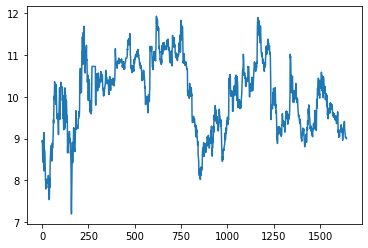

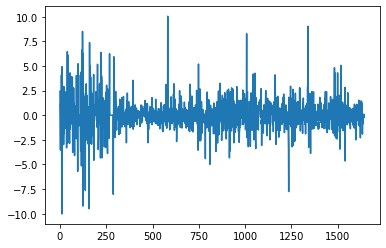

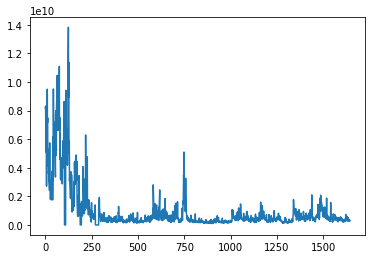

In [90]:
plt.plot(close_array)
plt.show()
plt.plot(change_array)
plt.show()
plt.plot(amount)
plt.show()

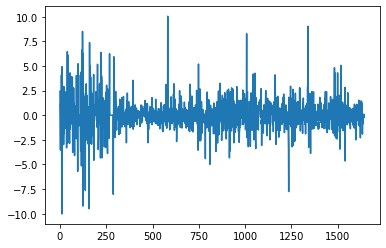

In [69]:
print("avg:",np.average(change_array))
print("std:",np.std(change_array))

avg: 0.014164032238442825
std: 1.5624824885357034


In [80]:
a = pd.Series(np.round(change_array),name="chg")
results=pd.Series(a).groupby(a).agg(['count']).reset_index()#groupby提取汇总统计值
print(results)

     chg  count
0  -10.0      1
1   -9.0      2
2   -8.0      3
3   -6.0      1
4   -5.0      4
5   -4.0     16
6   -3.0     47
7   -2.0     91
8   -1.0    329
9    0.0    689
10   1.0    284
11   2.0    105
12   3.0     34
13   4.0     18
14   5.0      8
15   6.0      6
16   7.0      2
17   8.0      1
18   9.0      2
19  10.0      1


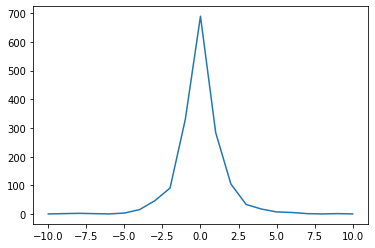

In [87]:
plt.plot(results['chg'],results['count'])
plt.show()